<b>Data source from Movie 100k dataset</b>
<p>Data loading and exploratory data analysis

In [1]:
## import and load packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load in the datafiles
# u.item - info about movies- includes movie id and genre info
# u.info - number of users, items, ratings in the dataset
# u.data - the full u dataset, 100k ratings by 943 users on 1682 items; each user rated at least 20 items
# u.user - demographic info of user data

items_df = r"/content/u.item"
users_df = r"/content/u.user"
ratings_df = r"/content/u.data"
info_df = r"/content/u.info"




In [3]:
items_df

'/content/u.item'

In [5]:
column_names = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
user_data = pd.read_csv(users_df, sep='|', names=column_names)

In [ ]:
user_data

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [ ]:
user_data.to_csv('user_data.csv', index=False)


In [ ]:
names = ['user_id', 'item_id', 'rating', 'timestamp']
ratings = pd.read_csv(ratings_df, sep='\t', names=names)

In [ ]:
ratings

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [ ]:
ratings.to_csv('ratings.csv')

In [ ]:
with open(items_df, 'r', encoding = 'utf-8', errors='ignore') as file:
  content = file.readlines()

# Use pandas to read the content
from io import StringIO
data = StringIO(''.join(content))


temp_column_names = [i for i in range(25)]
items = pd.read_csv(data, sep = '|', names = temp_column_names)

In [ ]:
items = items.drop([3,4,24],axis =1)

In [ ]:
item_genres = items.iloc[:,3:]
item_genres =  item_genres.values.tolist()
item_genres = [np.array(row) for row in item_genres]

In [ ]:
items = items.iloc[:,:3]

In [ ]:
items['genres'] = item_genres

In [ ]:
items = items.set_axis(['movie_id','title','date','genre'],axis = 1)
items

,movie_id,title,date,genre
0,1,Toy Story (1995),01-Jan-1995,"[0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,GoldenEye (1995),01-Jan-1995,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,3,Four Rooms (1995),01-Jan-1995,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,Get Shorty (1995),01-Jan-1995,"[0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
4,5,Copycat (1995),01-Jan-1995,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
1678,1679,B. Monkey (1998),06-Feb-1998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
1679,1680,Sliding Doors (1998),01-Jan-1998,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, ..."
1680,1681,You So Crazy (1994),01-Jan-1994,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
items.to_csv(r'movies_info.csv')

In [ ]:
with open(items_df, 'r', encoding='utf-8', errors='ignore') as file:
    content = file.readlines()

# Use pandas to read the content
from io import StringIO
data = StringIO(''.join(content))
temp_column_names = [i for i in range(25)]
genre_tab = pd.read_csv(data, sep = '|', names = temp_column_names)

In [ ]:
genre_tab = genre_tab.iloc[:,5:24]

In [ ]:
name =['unknown','Action', 'Adventure', 'Animation',
              'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
              'Thriller', 'War', 'Western']

genre_tab = genre_tab.set_axis(name,axis =1)
genre_tab

,unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1678,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1679,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1680,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Count the occurrence of each genre
genre_count = genre_tab.sum()

# Create a dictionary with column (category) names and their respective counts
genre_count_dict = dict(genre_count)

# Print the dictionary
print(genre_count_dict)

{'unknown': 2, 'Action': 251, 'Adventure': 135, 'Animation': 42, 'Children': 122, 'Comedy': 505, 'Crime': 109, 'Documentary': 50, 'Drama': 725, 'Fantasy': 22, 'Film-Noir': 24, 'Horror': 92, 'Musical': 56, 'Mystery': 61, 'Romance': 247, 'Sci-Fi': 101, 'Thriller': 251, 'War': 71, 'Western': 27}


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'unknown'),
  Text(1, 0, 'Action'),
  Text(2, 0, 'Adventure'),
  Text(3, 0, 'Animation'),
  Text(4, 0, 'Children'),
  Text(5, 0, 'Comedy'),
  Text(6, 0, 'Crime'),
  Text(7, 0, 'Documentary'),
  Text(8, 0, 'Drama'),
  Text(9, 0, 'Fantasy'),
  Text(10, 0, 'Film-Noir'),
  Text(11, 0, 'Horror'),
  Text(12, 0, 'Musical'),
  Text(13, 0, 'Mystery'),
  Text(14, 0, 'Romance'),
  Text(15, 0, 'Sci-Fi'),
  Text(16, 0, 'Thriller'),
  Text(17, 0, 'War'),
  Text(18, 0, 'Western')])

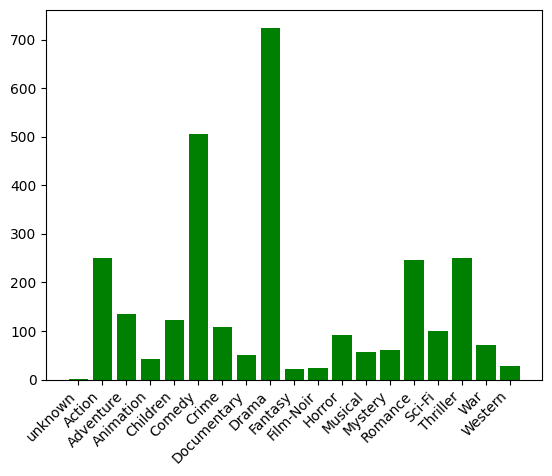

In [ ]:
plt.bar(name, list(genre_count), color='green')
plt.xticks(rotation=45, ha='right', fontsize=10)

Text(0.5, 1.0, 'User Gender Ratio')

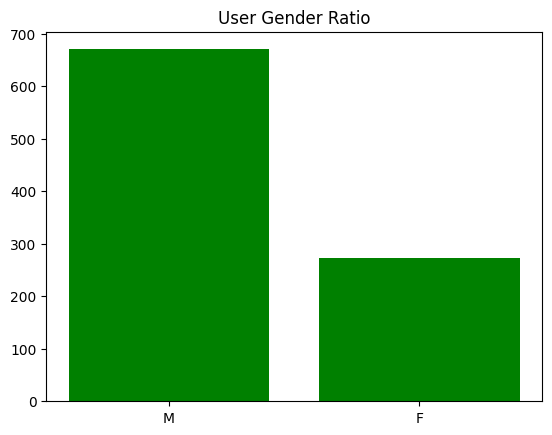

In [ ]:
# count the gender and display ratio
gender_count = user_data['gender'].value_counts()

plt.bar(['M','F'], list(gender_count), color = 'green')
plt.title('User Gender Ratio')

In [ ]:
user_data

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [ ]:
ratings

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [ ]:
# Pivot the DataFrame
pivoted_ratings = ratings.pivot(index='user_id', columns='item_id', values='rating')

# Print the result
print(pivoted_ratings)

item_id  1     2     3     4     5     6     7     8     9     10    ...  \
user_id                                                              ...   
1         5.0   3.0   4.0   3.0   3.0   5.0   4.0   1.0   5.0   3.0  ...   
2         4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   2.0  ...   
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
5         4.0   3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
939       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   5.0   NaN  ...   
940       NaN   NaN   NaN   2.0   NaN   NaN   4.0   5.0   3.0   NaN  ...   
941       5.0   NaN   NaN   NaN   NaN   NaN   4.0   NaN   NaN   NaN  ...   
942       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
943       NaN   5.0   NaN   NaN   NaN   NaN   NaN   NaN   3.0   NaN  ...   

item_id  16

In [ ]:
summary = pivoted_ratings.describe()
print(summary)

item_id        1           2          3           4          5          6     \
count    452.000000  131.000000  90.000000  209.000000  86.000000  26.000000   
mean       3.878319    3.206107   3.033333    3.550239   3.302326   3.576923   
std        0.927897    0.966497   1.212760    0.965069   0.946446   1.301478   
min        1.000000    1.000000   1.000000    1.000000   1.000000   1.000000   
25%        3.000000    3.000000   2.000000    3.000000   3.000000   3.000000   
50%        4.000000    3.000000   3.000000    4.000000   3.000000   4.000000   
75%        5.000000    4.000000   4.000000    4.000000   4.000000   5.000000   
max        5.000000    5.000000   5.000000    5.000000   5.000000   5.000000   

item_id        7           8           9          10    ...  1673  1674  1675  \
count    392.000000  219.000000  299.000000  89.000000  ...   1.0   1.0   1.0   
mean       3.798469    3.995434    3.896321   3.831461  ...   3.0   4.0   3.0   
std        0.982037    1.002281    1

In [ ]:
# replacing all NaNs for the ratings with 0
pivoted_ratings = pivoted_ratings.fillna(0)

In [ ]:
pivoted_ratings

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Merging the user data frames into one big one to do more data analysis

merged_data = pd.merge(user_data, pivoted_ratings, on='user_id')
print(merged_data)

     user_id  age gender     occupation zip_code    1    2    3    4    5  \
0          1   24      M     technician    85711  5.0  3.0  4.0  3.0  3.0   
1          2   53      F          other    94043  4.0  0.0  0.0  0.0  0.0   
2          3   23      M         writer    32067  0.0  0.0  0.0  0.0  0.0   
3          4   24      M     technician    43537  0.0  0.0  0.0  0.0  0.0   
4          5   33      F          other    15213  4.0  3.0  0.0  0.0  0.0   
..       ...  ...    ...            ...      ...  ...  ...  ...  ...  ...   
938      939   26      F        student    33319  0.0  0.0  0.0  0.0  0.0   
939      940   32      M  administrator    02215  0.0  0.0  0.0  2.0  0.0   
940      941   20      M        student    97229  5.0  0.0  0.0  0.0  0.0   
941      942   48      F      librarian    78209  0.0  0.0  0.0  0.0  0.0   
942      943   22      M        student    77841  0.0  5.0  0.0  0.0  0.0   

     ...  1673  1674  1675  1676  1677  1678  1679  1680  1681  1682  
0   

In [ ]:
summary = merged_data.describe()
print(summary)

          user_id         age           1           2           3           4  \
count  943.000000  943.000000  943.000000  943.000000  943.000000  943.000000   
mean   472.000000   34.051962    1.858961    0.445387    0.289502    0.786850   
std    272.364951   12.192740    2.042084    1.166107    0.966513    1.543481   
min      1.000000    7.000000    0.000000    0.000000    0.000000    0.000000   
25%    236.500000   25.000000    0.000000    0.000000    0.000000    0.000000   
50%    472.000000   31.000000    0.000000    0.000000    0.000000    0.000000   
75%    707.500000   43.000000    4.000000    0.000000    0.000000    0.000000   
max    943.000000   73.000000    5.000000    5.000000    5.000000    5.000000   

                5           6           7           8  ...        1673  \
count  943.000000  943.000000  943.000000  943.000000  ...  943.000000   
mean     0.301166    0.098621    1.579003    0.927890  ...    0.003181   
std      0.992792    0.623179    1.977008    1.7

In [ ]:
merged_data.to_csv('movie_100k_all_user.csv')

In [ ]:
merged_data.columns

Index([   'user_id',        'age',     'gender', 'occupation',   'zip_code',
                  1,            2,            3,            4,            5,
       ...
               1673,         1674,         1675,         1676,         1677,
               1678,         1679,         1680,         1681,         1682],
      dtype='object', length=1687)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Select relevant demographic columns and ratings
selected_columns = ['age', 'gender', 'occupation'] + list(range(1,1683))

#creating a new DF with the selected columns for analysis
X = merged_data[selected_columns]

#convert occupation & gender categorical values to numeric
le_gender = LabelEncoder()
X['gender'] = le_gender.fit_transform(X['gender'])
le_occupation = LabelEncoder()
X['occupation'] = le_occupation.fit_transform(X['occupation'])

# Convert all column names to strings
X.columns = X.columns.astype(str)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3)  # Example with 3 clusters
kmeans.fit(X)

merged_data['cluster'] = kmeans.labels_  # Assign clusters to users

print(merged_data[['user_id','cluster']])

<ipython-input-34-d0dc31b935dd>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['gender'] = le_gender.fit_transform(X['gender'])
<ipython-input-34-d0dc31b935dd>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['occupation'] = le_occupation.fit_transform(X['occupation'])
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_

     user_id  cluster
0          1        0
1          2        2
2          3        1
3          4        1
4          5        0
..       ...      ...
938      939        1
939      940        1
940      941        1
941      942        2
942      943        0

[943 rows x 2 columns]


In [ ]:
# Convert categorical columns to numeric using encoding (if applicable)
from sklearn.preprocessing import LabelEncoder
# Encode categorical columns
le_gender = LabelEncoder()
le_occupation = LabelEncoder()

merged_data['gender_encoded'] = le_gender.fit_transform(merged_data['gender'])
merged_data['occupation_encoded'] = le_occupation.fit_transform(merged_data['occupation'])

# Separate numeric columns
numeric_columns = merged_data.select_dtypes(include='number')

# Calculate mean of each numeric feature for each cluster
cluster_summary_numeric = numeric_columns.groupby(merged_data['cluster']).mean()
print("Cluster Summary for Numeric Data:\n", cluster_summary_numeric)

# Analyze categorical columns
categorical_columns = merged_data.select_dtypes(include='object')

for col in categorical_columns.columns:
    if col != 'cluster':  # Exclude the cluster column itself
        print(f"Value counts for {col} within clusters:")
        print(merged_data.groupby('cluster')[col].value_counts())
        print()

Cluster Summary for Numeric Data:
             user_id        age         1         2         3         4  \
cluster                                                                  
0        459.095833  32.758333  3.116667  1.404167  0.650000  2.279167   
1        476.106383  25.626478  1.669031  0.170213  0.236407  0.342790   
2        476.857143  47.889286  1.067857  0.039286  0.060714  0.178571   

                5         6         7         8  ...      1676    1677  \
cluster                                          ...                     
0        0.808333  0.162500  2.783333  2.316667  ...  0.000000  0.0125   
1        0.191489  0.063830  1.491726  0.517730  ...  0.004728  0.0000   
2        0.032143  0.096429  0.678571  0.357143  ...  0.000000  0.0000   

             1678      1679      1680    1681    1682  cluster  \
cluster                                                          
0        0.000000  0.000000  0.000000  0.0125  0.0125      0.0   
1        0.002364  0.0070

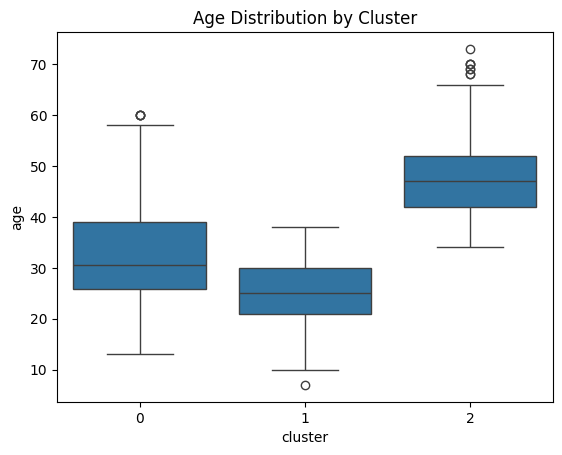

ValueError: Could not interpret value `1` for `y`. An entry with this name does not appear in `data`.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example for age
sns.boxplot(x='cluster', y='age', data=merged_data)
plt.title('Age Distribution by Cluster')
plt.show()

# Example for movie ratings (for a specific movie, e.g., movie 1)
sns.boxplot(x='cluster', y='1', data=merged_data)
plt.title('Ratings for Movie 1 by Cluster')
plt.show()

In [ ]:
# Display unique values to diagnose the issue
print(merged_data['cluster'].unique())

[0 2 1]


          PC1        PC2  cluster
0  471.066581  28.873863        0
1  469.969608 -16.971434        2
2  468.951902  -9.018006        1
3  467.957793  -8.681195        1
4  467.009349   7.157746        0


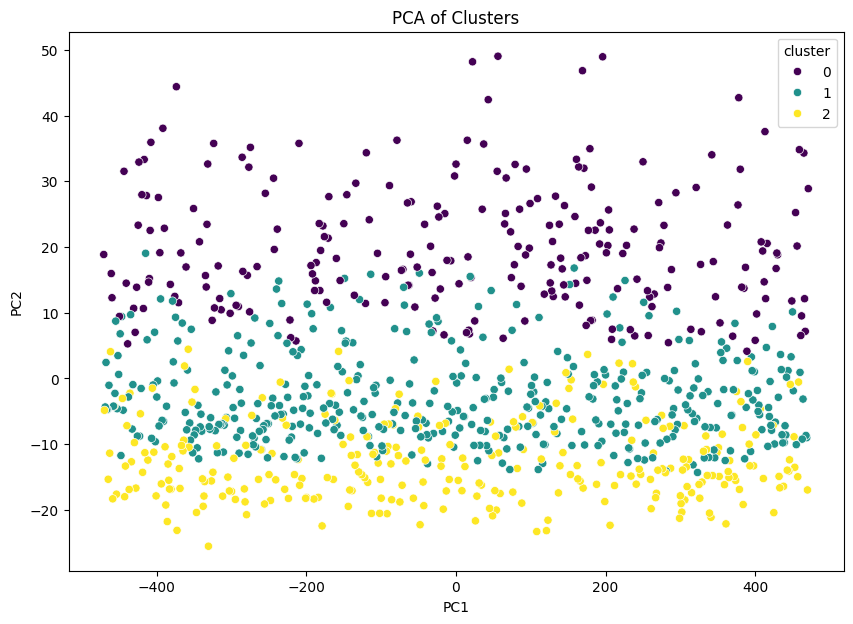

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Select only numeric columns
numeric_data = merged_data.select_dtypes(include='number')
# convert column names to strings
numeric_data.columns = numeric_data.columns.astype(str)
# Convert to numeric and drop rows with NaN values
numeric_data = numeric_data.apply(pd.to_numeric, errors='coerce')
numeric_data = numeric_data.dropna()

# Perform PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(numeric_data)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
pca_df['cluster'] = merged_data['cluster'].values

print(pca_df.head())
# Plot PCA
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis')
plt.title('PCA of Clusters')
plt.show()

In [ ]:
# Calculate the average age per cluster
age_per_cluster = merged_data.groupby('cluster')['age'].mean().reset_index()

# Calculate gender distribution per cluster
gender_per_cluster = merged_data.groupby(['cluster', 'gender']).size().unstack(fill_value=0)

# Calculate occupation distribution per cluster
occupation_per_cluster = merged_data.groupby(['cluster', 'occupation']).size().unstack(fill_value=0)

# View demographic breakdown
print(age_per_cluster)
print(gender_per_cluster)
print(occupation_per_cluster)

   cluster        age
0        0  32.758333
1        1  25.626478
2        2  47.889286
gender     F    M
cluster          
0         52  188
1        123  300
2         98  182
occupation  administrator  artist  doctor  educator  engineer  entertainment  \
cluster                                                                        
0                      21       5       1        20        27              5   
1                      26      16       1        22        18              9   
2                      32       7       5        53        22              4   

occupation  executive  healthcare  homemaker  lawyer  ...  marketing  none  \
cluster                                               ...                    
0                   8           5          0       4  ...          5     2   
1                  10           4          5       4  ...         10     6   
2                  14           7          2       4  ...         11     1   

occupation  other  programmer 

In [ ]:
merged_data.columns

Index([           'user_id',                'age',             'gender',
               'occupation',           'zip_code',                    1,
                          2,                    3,                    4,
                          5,
       ...
                       1676,                 1677,                 1678,
                       1679,                 1680,                 1681,
                       1682,            'cluster',     'gender_encoded',
       'occupation_encoded'],
      dtype='object', length=1690)

In [ ]:
merged_data.to_csv('movie_100k_all_user.csv')

In [ ]:
# Relabel the movie columns (1-1682) as strings
merged_data.columns = merged_data.columns.map(lambda x: str(x) if isinstance(x, int) else x)

In [ ]:
# Print the column names of the DataFrame
print(merged_data.columns)

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code', '1', '2', '3',
       '4', '5',
       ...
       '1676', '1677', '1678', '1679', '1680', '1681', '1682', 'cluster',
       'gender_encoded', 'occupation_encoded'],
      dtype='object', length=1690)


In [ ]:
# Ensure that only movie rating columns (1-1682) are included in the calculation
numeric_movie_columns = merged_data.loc[:, '1':'1682']

# Add the cluster labels back to the original data
merged_data['cluster'] = pca_df['cluster']

# Group by cluster and calculate the mean of only the movie rating columns
cluster_movie_ratings = merged_data.groupby('cluster')[numeric_movie_columns.columns].mean().reset_index()

# View the average ratings for each movie in each cluster
print(cluster_movie_ratings.head())

   cluster         1         2         3         4         5         6  \
0        0  3.116667  1.404167  0.650000  2.279167  0.808333  0.162500   
1        1  1.669031  0.170213  0.236407  0.342790  0.191489  0.063830   
2        2  1.067857  0.039286  0.060714  0.178571  0.032143  0.096429   

          7         8         9  ...      1673      1674      1675      1676  \
0  2.783333  2.316667  2.129167  ...  0.000000  0.016667  0.000000  0.000000   
1  1.491726  0.517730  0.848700  ...  0.000000  0.000000  0.007092  0.004728   
2  0.678571  0.357143  1.053571  ...  0.010714  0.000000  0.000000  0.000000   

     1677      1678      1679      1680    1681    1682  
0  0.0125  0.000000  0.000000  0.000000  0.0125  0.0125  
1  0.0000  0.002364  0.007092  0.004728  0.0000  0.0000  
2  0.0000  0.000000  0.000000  0.000000  0.0000  0.0000  

[3 rows x 1683 columns]


In [ ]:
# Identifying Top-Rated Movies per Cluster:
# Get the top-rated movies for each cluster
top_movies_per_cluster = cluster_movie_ratings.melt(id_vars='cluster', var_name='movie_id', value_name='rating')
top_movies_per_cluster = top_movies_per_cluster.groupby('cluster').apply(lambda x: x.nlargest(5, 'rating')).reset_index(drop=True)

# View the top-rated movies per cluster
print(top_movies_per_cluster)

    cluster movie_id    rating
0         0       50  4.212500
1         0      174  4.212500
2         0       98  3.841667
3         0      172  3.754167
4         0      181  3.666667
5         1       50  2.505910
6         1      288  2.238771
7         1      258  2.026005
8         1      181  1.919622
9         1      294  1.858156
10        2      286  2.450000
11        2      100  2.028571
12        2      258  1.867857
13        2      300  1.721429
14        2       50  1.678571


In [ ]:
#cluster 0 top 5 movie ratings
print(items.iloc[[49, 257, 287, 180, 293]],['title','movie_id'])

     movie_id                      title         date  \
49         50           Star Wars (1977)  01-Jan-1977   
257       258             Contact (1997)  11-Jul-1997   
287       288              Scream (1996)  20-Dec-1996   
180       181  Return of the Jedi (1983)  14-Mar-1997   
293       294           Liar Liar (1997)  21-Mar-1997   

                                                 genre  
49   [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...  
257  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...  
287  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...  
180  [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...  
293  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   ['title', 'movie_id']


In [ ]:
#cluster 1 top 5 movie ratings
print(items.iloc[[49, 173, 97, 171, 180]],['title','movie_id'])

     movie_id                             title         date  \
49         50                  Star Wars (1977)  01-Jan-1977   
173       174    Raiders of the Lost Ark (1981)  01-Jan-1981   
97         98  Silence of the Lambs, The (1991)  01-Jan-1991   
171       172   Empire Strikes Back, The (1980)  01-Jan-1980   
180       181         Return of the Jedi (1983)  14-Mar-1997   

                                                 genre  
49   [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...  
173  [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
97   [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...  
171  [0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, ...  
180  [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...   ['title', 'movie_id']


In [ ]:
#cluster 2 top 5 movie ratings
print(items.iloc[[285, 99, 257, 299, 49]],['title','movie_id'])

     movie_id                        title         date  \
285       286  English Patient, The (1996)  15-Nov-1996   
99        100                 Fargo (1996)  14-Feb-1997   
257       258               Contact (1997)  11-Jul-1997   
299       300         Air Force One (1997)  01-Jan-1997   
49         50             Star Wars (1977)  01-Jan-1977   

                                                 genre  
285  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, ...  
99   [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...  
257  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...  
299  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
49   [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...   ['title', 'movie_id']


In [ ]:
print(merged_data.columns)

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code', '1', '2', '3',
       '4', '5',
       ...
       '1676', '1677', '1678', '1679', '1680', '1681', '1682', 'cluster',
       'gender_encoded', 'occupation_encoded'],
      dtype='object', length=1690)


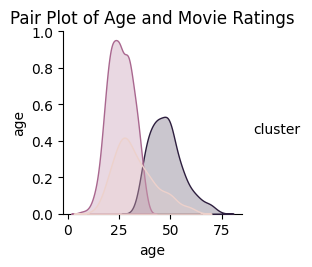

In [ ]:
# Example for age and ratings
sns.pairplot(merged_data[['age', 'gender', 'occupation', 'cluster']], hue='cluster')
plt.title('Pair Plot of Age and Movie Ratings')
plt.show()

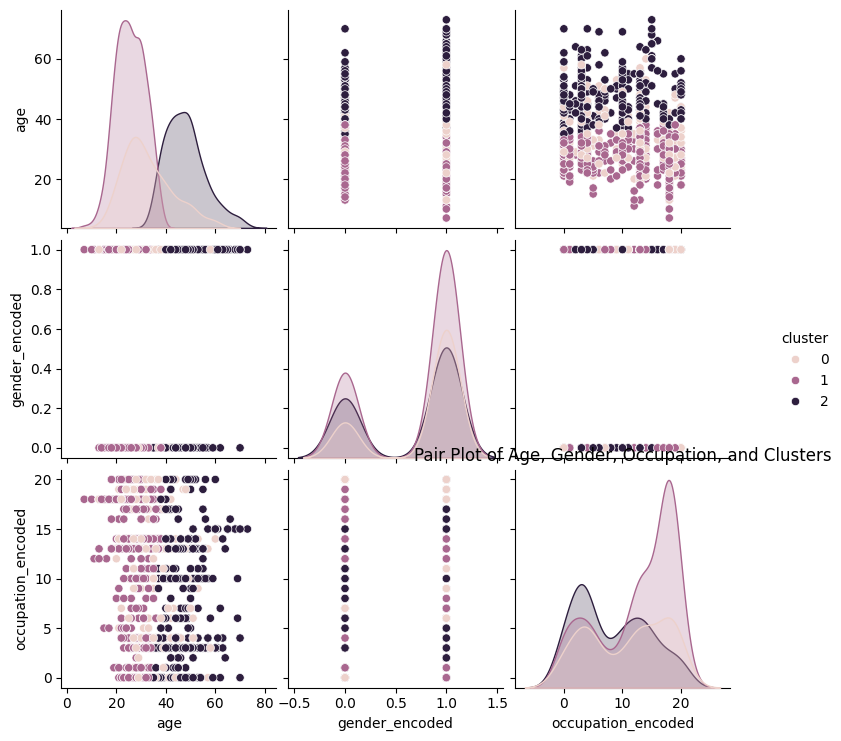

In [ ]:
# Use encoded columns for better visualization
sns.pairplot(merged_data[['age', 'gender_encoded', 'occupation_encoded', 'cluster']], hue='cluster')
plt.title('Pair Plot of Age, Gender, Occupation, and Clusters')
plt.show()

In [ ]:
print('age' in merged_data.columns)         # Should return True if 'age' exists
print('gender' in merged_data.columns)      # Should return True if 'gender' exists
print('occupation' in merged_data.columns)  # Should return True if 'occupation' exists

True
True
True


In [ ]:
user_genre = pd.read_csv('user_genre.csv')

In [ ]:
user_genre

,Unnamed: 0,unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user_avg
0,308,0.0,3.605263,3.604651,4.083333,3.7200,3.865079,3.945946,4.4,3.699387,...,4.230769,3.703704,3.785714,3.789474,3.681818,3.825000,3.743902,3.766667,3.777778,3.621048
1,287,0.0,4.050000,4.125000,3.333333,4.0000,3.869565,4.888889,0.0,4.363636,...,0.000000,3.800000,0.000000,4.666667,3.909091,3.727273,4.111111,3.800000,0.000000,2.770767
2,148,0.0,3.916667,3.933333,4.428571,3.8000,4.450000,3.666667,0.0,3.680000,...,5.000000,2.000000,4.454545,3.000000,4.333333,4.461538,3.600000,4.100000,2.000000,3.201298
3,280,0.0,3.068493,3.051282,3.846154,3.6875,3.674699,3.666667,0.0,3.735632,...,4.500000,3.416667,3.933333,3.857143,3.592593,3.129032,3.500000,3.550000,3.000000,3.177677
4,66,0.0,3.437500,3.000000,3.000000,3.0000,3.333333,3.666667,0.0,3.571429,...,0.000000,4.000000,1.000000,3.000000,3.375000,3.750000,3.500000,3.800000,0.000000,2.391259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,273,0.0,3.000000,3.000000,0.000000,3.0000,3.857143,3.500000,0.0,3.733333,...,0.000000,2.000000,4.000000,3.333333,3.666667,0.000000,3.600000,3.500000,0.000000,2.115288
939,685,0.0,1.000000,0.000000,0.000000,0.0000,2.250000,1.800000,0.0,2.222222,...,2.500000,2.000000,2.000000,2.000000,1.833333,0.000000,2.000000,1.000000,0.000000,1.084503
940,713,0.0,2.200000,0.000000,0.000000,3.0000,2.857143,3.000000,0.0,3.111111,...,4.000000,3.000000,1.000000,3.000000,2.800000,2.000000,2.888889,2.333333,0.000000,1.852130
941,631,0.0,2.666667,2.000000,0.000000,0.0000,2.600000,3.250000,0.0,3.750000,...,0.000000,3.000000,4.000000,2.666667,3.000000,0.000000,3.142857,3.000000,0.000000,1.740852
